In [1]:
import cv2 as cv
import random
import numpy as np
import sklearn as sk
import math
from matplotlib import pyplot as plt

In [2]:
my_SIFT_instance = cv.SIFT_create()

In [3]:
img1 = cv.imread("backpack_right.png")
img2 = cv.imread("backpack_left.png")
lenaimg1 = cv.imread("lena.png")
lenaimg2 = cv.imread("lena.png")

## Backpack SIFT

In [4]:
sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
out1 = np.zeros((img1.shape))
out1 = cv.drawKeypoints(img1, kp1, out1)
out2 = np.zeros((img2.shape))
out2 = cv.drawKeypoints(img2, kp2, out2)

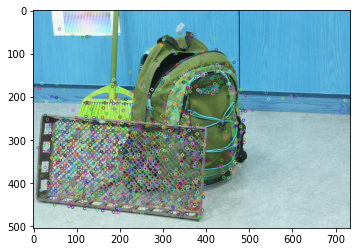

In [5]:
plt.imshow(out1)

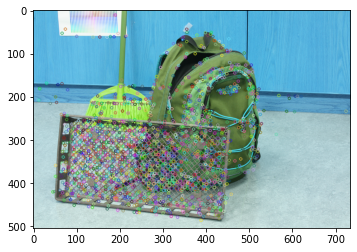

In [6]:
plt.imshow(out2)

## Lena SIFT

In [7]:
lenakp1, lenades1 = sift.detectAndCompute(lenaimg1,None)
lenakp2, lenades2 = sift.detectAndCompute(lenaimg2,None)
lenaout1 = np.zeros((lenaimg1.shape))
lenaout1 = cv.drawKeypoints(lenaimg1, lenakp1, lenaout1)
lenaout2 = np.zeros((lenaimg2.shape))
lenaout2 = cv.drawKeypoints(lenaimg2, lenakp2, lenaout2)

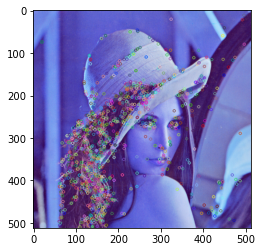

In [8]:
plt.imshow(lenaout1)

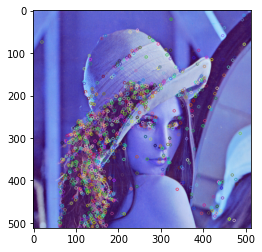

In [9]:
plt.imshow(lenaout2)

# Brute Force Matcher

## Backpack

In [10]:
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
testBF = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None)

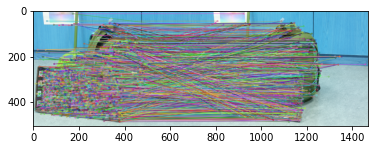

In [11]:
plt.imshow(testBF)

## Lowe's Ratio Test

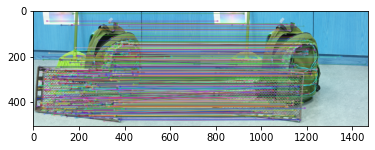

In [12]:
good = []
for m,n in matches:
    if(m.distance < 0.75*n.distance):
        good.append([m])

img3BF = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)
plt.imshow(img3BF)

## Lena

In [13]:
lenamatches = bf.knnMatch(lenades1,lenades2,k=2)
lenatestBF = cv.drawMatchesKnn(lenaimg1,lenakp1,lenaimg2,lenakp2,lenamatches,None)

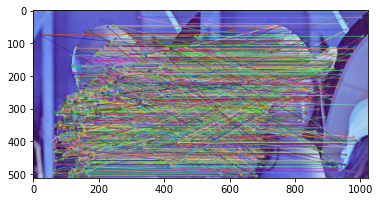

In [14]:
plt.imshow(lenatestBF)

## Lowe's Ratio Test

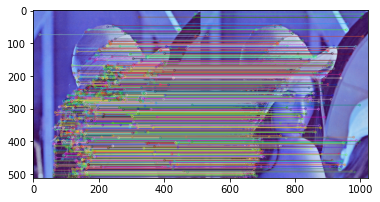

In [15]:
lenagood = []
for m,n in lenamatches:
    if(m.distance < 0.75*n.distance):
        lenagood.append([m])

lenaimg3BF = cv.drawMatchesKnn(lenaimg1,lenakp1,lenaimg2,lenakp2,lenagood,None,flags=2)
plt.imshow(lenaimg3BF)

# Histogram

## Backpack

In [16]:
allmatches = dict()
for m,n in matches:
    if(not (round(m.distance) in allmatches)):
        allmatches[round(m.distance)] = 1
    else:
        allmatches[round(m.distance)] += 1
lowematches = dict()
for m in good:
    if(not (round(m[0].distance) in lowematches)):
        lowematches[round(m[0].distance)] = 1
    else:
        lowematches[round(m[0].distance)] += 1

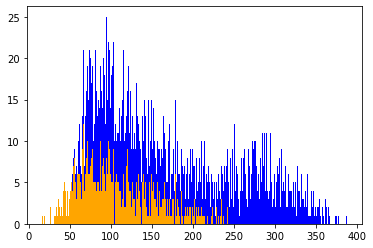

In [17]:
plt.bar(allmatches.keys(), allmatches.values(), 1, color='b')
plt.bar(lowematches.keys(), lowematches.values(), 1, color='orange')
plt.show()

## Lena

In [18]:
lenaallmatches = dict()
for m,n in lenamatches:
    if(not (round(m.distance) in lenaallmatches)):
        lenaallmatches[round(m.distance)] = 1
    else:
        lenaallmatches[round(m.distance)] += 1
lenalowematches = dict()
for m in lenagood:
    if(not (round(m[0].distance) in lenalowematches)):
        lenalowematches[round(m[0].distance)] = 1
    else:
        lenalowematches[round(m[0].distance)] += 1

In [19]:
lenaallmatches.values()

dict_values([1100])

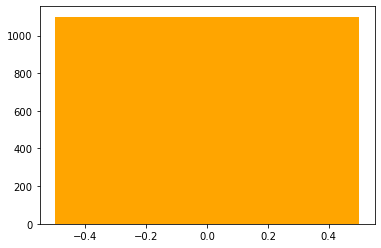

In [20]:
plt.bar(lenaallmatches.keys(), lenaallmatches.values(), 1, color='b')
plt.bar(lenalowematches.keys(), lenalowematches.values(), 1, color='orange')
plt.show()

### The histogram shows that not all of the matches in the unfiltered version is a good match. And in the case of lena, all of the matches have a distance of 0 so all of them pass.

# FLANN Matcher (for fun)

In [21]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)


In [22]:
matchesMask = [[0,0] for i in range(len(matches))]
for i,(m,n) in enumerate(matches):
    if(m.distance < 0.7*n.distance):
        matchesMask[i] = [1,0]

draw_params = dict(matchColor = (0,255,0), singlePointColor = (255,0,0), matchesMask = matchesMask, flags = 0)

img3Flann = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

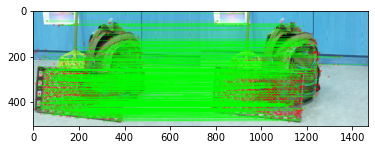

In [23]:
plt.imshow(img3Flann)

# Histogram

In [24]:
allmatches = dict()
for m,n in matches:
    if(not (round(m.distance) in allmatches)):
        allmatches[round(m.distance)] = 1
    else:
        allmatches[round(m.distance)] += 1
lowematches = dict()
for m in good:
    if(not (round(m[0].distance) in lowematches)):
        lowematches[round(m[0].distance)] = 1
    else:
        lowematches[round(m[0].distance)] += 1

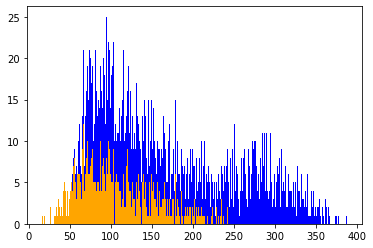

In [25]:
plt.bar(allmatches.keys(), allmatches.values(), 1, color='b')
plt.bar(lowematches.keys(), lowematches.values(), 1, color='orange')
plt.show()